<a href="https://colab.research.google.com/github/Jasmine-kaur8/Census_Income_Project/blob/main/Census_Income_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from google.colab import files
uploaded = files.upload()

Saving census_income(project).csv to census_income(project) (1).csv


Importing the data

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Importing required libraries

In [72]:
data = pd.read_csv('census_income(project).csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Reading the data

In [73]:
data.shape

(32560, 15)

The data has 32561 rows and 15 columns

In [74]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null values

In [75]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There is outliers in the capital_gain, and standard deviation is very high of capital_gain and capital_loss.

In [76]:
data['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

There is class imbalance

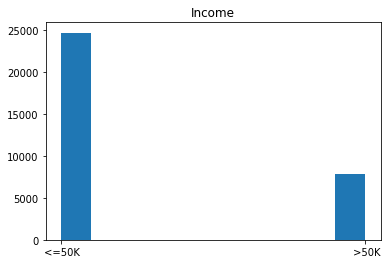

In [77]:
#HISTOGRAM

data['Income'].hist(grid = False)
plt.title('Income')
plt.show()

Visual representation of income

In [78]:
Y = data.groupby('Income')
A = Y.mean()
A

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Income,,,,,,
<=50K,36.783648,190345.429467,9.594927,148.670537,53.145071,38.840163
>50K,44.249841,188005.000000,11.611657,4006.142456,195.001530,45.473026


 

*    People with average age around 44 are more likely to earn greater than $50K  than  those  with  average  age  around  36. 
*    Those with education level around 11 are more likely to earn greater than $50K than those with education around 9
*    People with high capital loss and high capital gain are more likely to earn greater than $50K than those with low capital_gain and low capital_loss.  

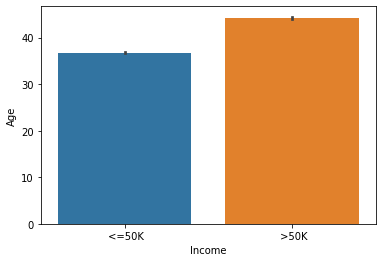

In [79]:
sns.barplot(y='Age', x='Income', data=data)

Higher age group people are more likely to earn greater than $50K.

Text(0.5, 1.0, 'count plot for income and sex')

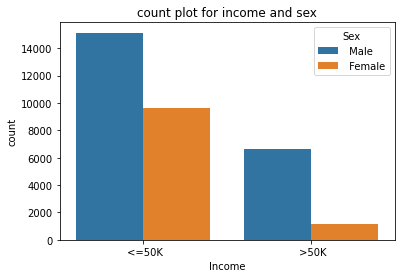

In [82]:
sns.countplot(data['Income'], hue = data['Sex'])
plt.title('count plot for income and sex')

More males earn more both- less than $50K and more than $50K

Text(0.5, 1.0, 'count plot for Education_num and sex')

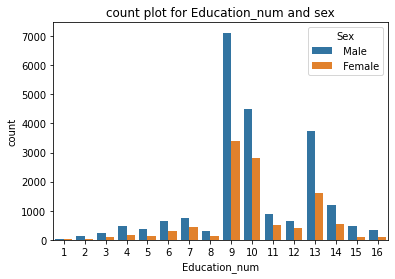

In [89]:
sns.countplot(data['Education_num'], hue = data['Sex'])
plt.title('count plot for Education_num and sex')

The most number of people have done 9 years of education. The male corresponds are more than the females irrespective of the number of the number of years.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


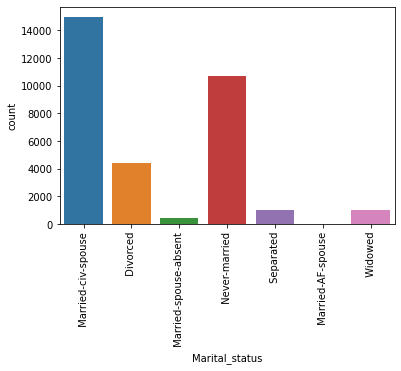

In [94]:
print(data['Marital_status'].value_counts())
sns.countplot(data['Marital_status'])
plt.xticks(rotation = 90);

Most people are married, second highest is never married and the third are divorced.

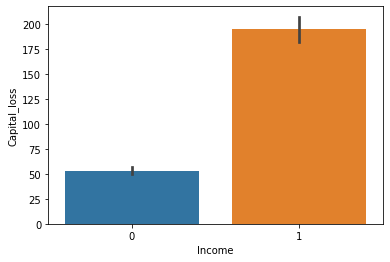

In [35]:
sns.barplot(y='Capital_loss', x='Income', data=data)

Capital loss is huge to the people with income greater than $50K.

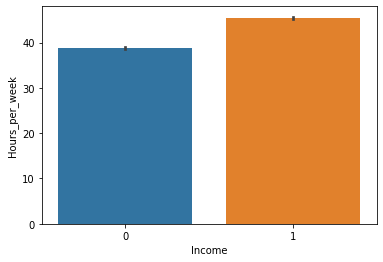

In [36]:
sns.barplot(y='Hours_per_week', x='Income', data=data)

More number of work is done by those who earn greater than $50K

In [19]:
from sklearn.preprocessing import LabelEncoder

Imported label encoder

In [20]:
le = LabelEncoder()

Initialized label encoder

In [23]:
data['Workclass']=le.fit_transform(data['Workclass'])
data['Education']=le.fit_transform(data['Education'])
data['Marital_status']=le.fit_transform(data['Marital_status'])
data['Occupation']=le.fit_transform(data['Occupation'])
data['Relationship']=le.fit_transform(data['Relationship'])
data['Race']=le.fit_transform(data['Race'])
data['Sex']=le.fit_transform(data['Sex'])
data['Native_country']=le.fit_transform(data['Native_country'])
data['Income']=le.fit_transform(data['Income'])

Transformed the data with label encoder

In [24]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


Reading the data after manipulation

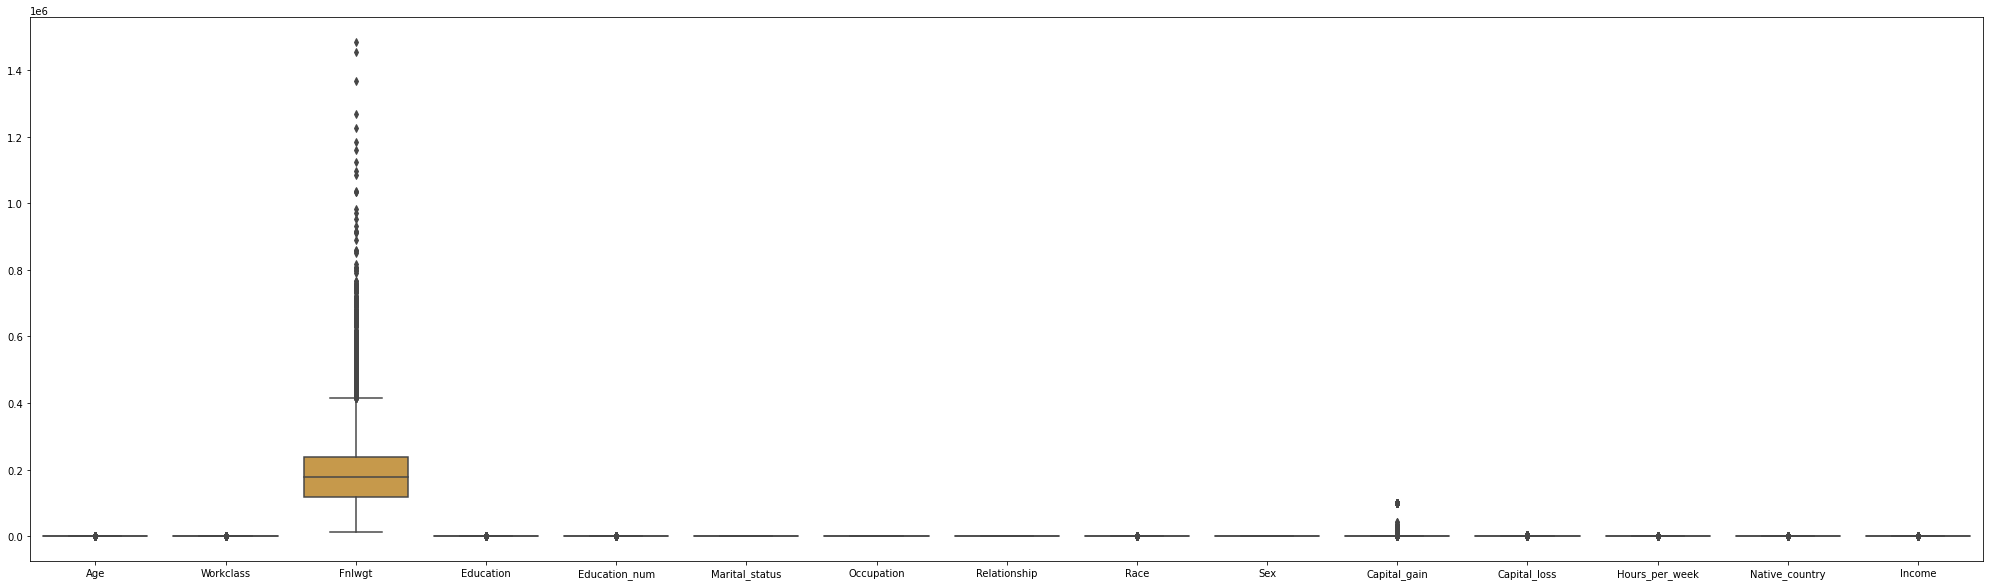

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(35, 10))
sns.boxplot(data = data, ax=ax)
plt.show()

There are many outliers in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88c260dd10>,
      dtype=object)

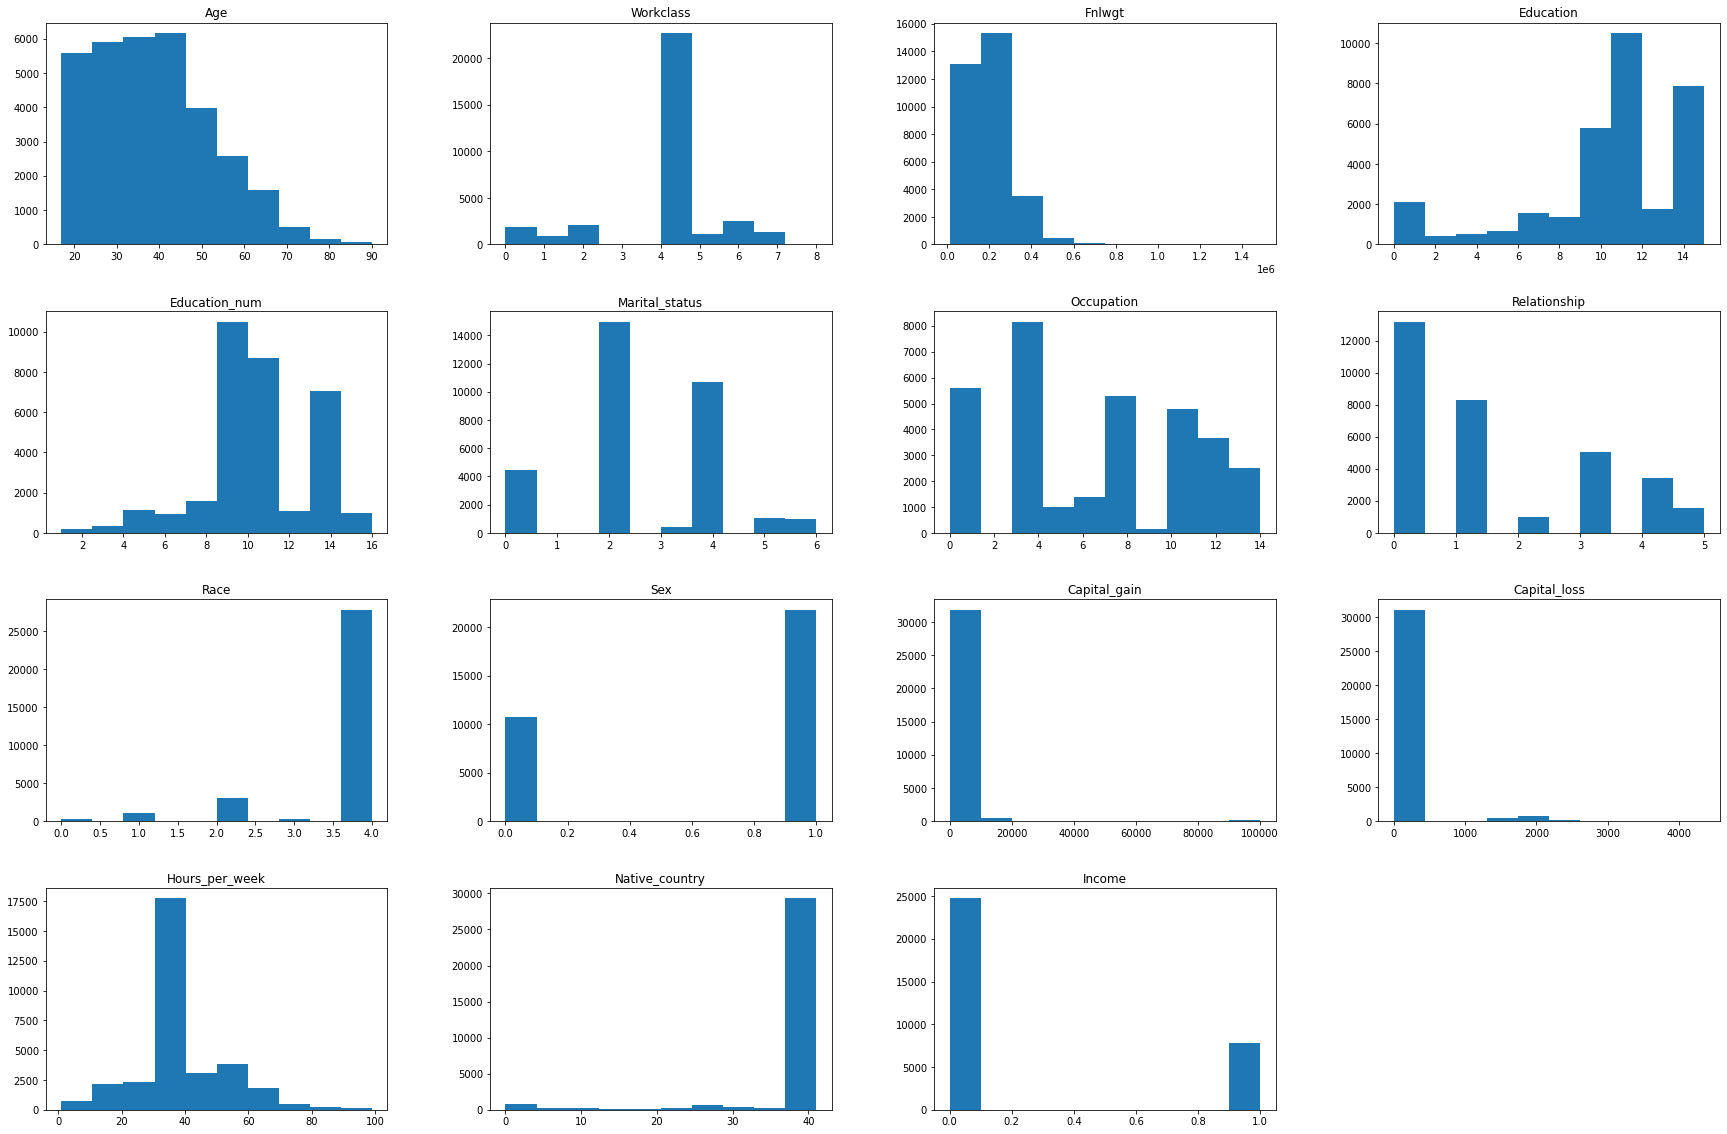

In [26]:
data.hist(figsize = (30,20), grid = False)

The data is very skewed

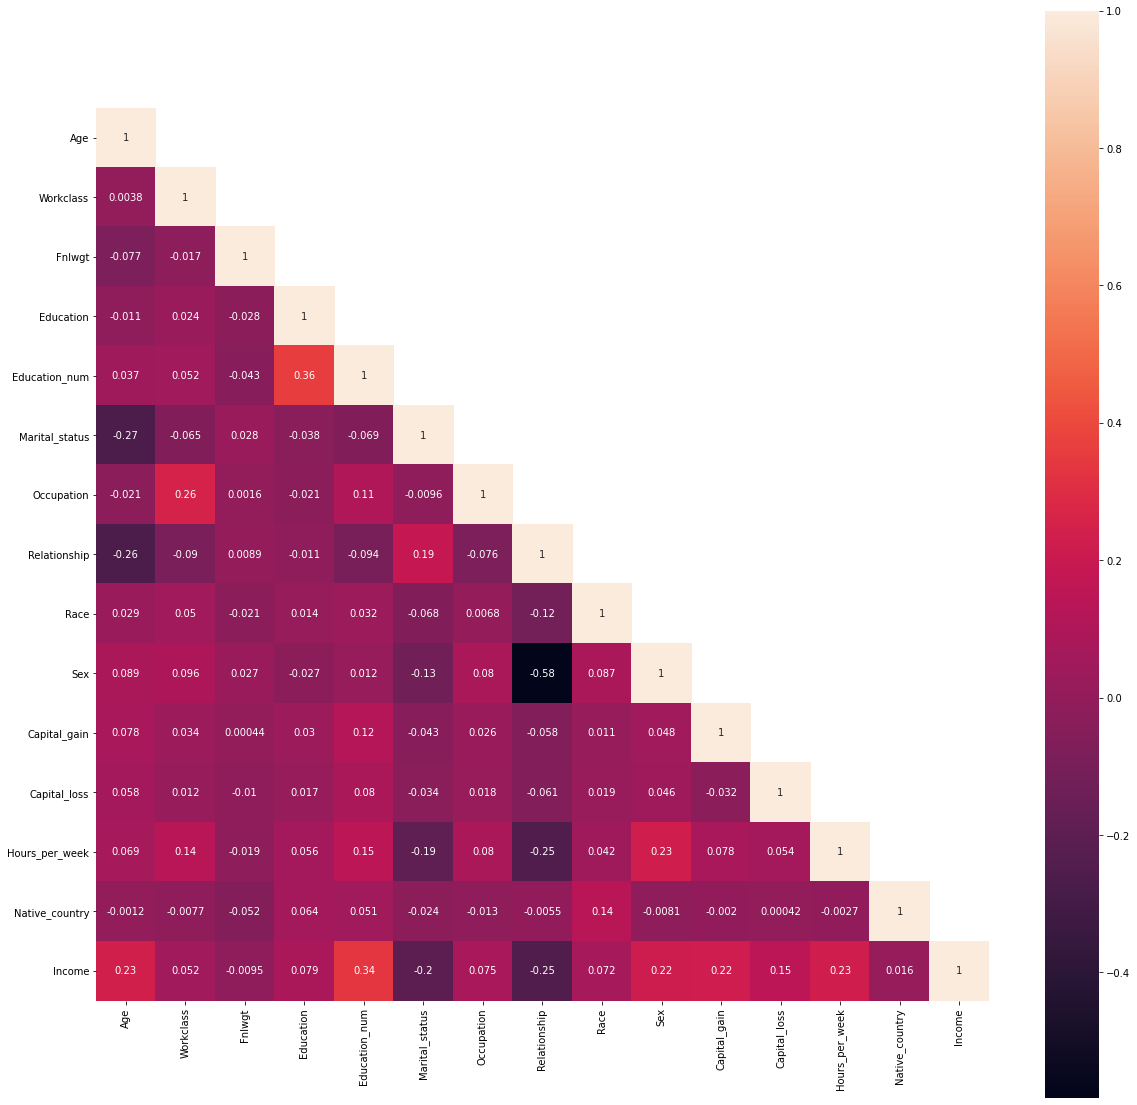

In [27]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(20,20)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

There is no such strong relationship between any two features.

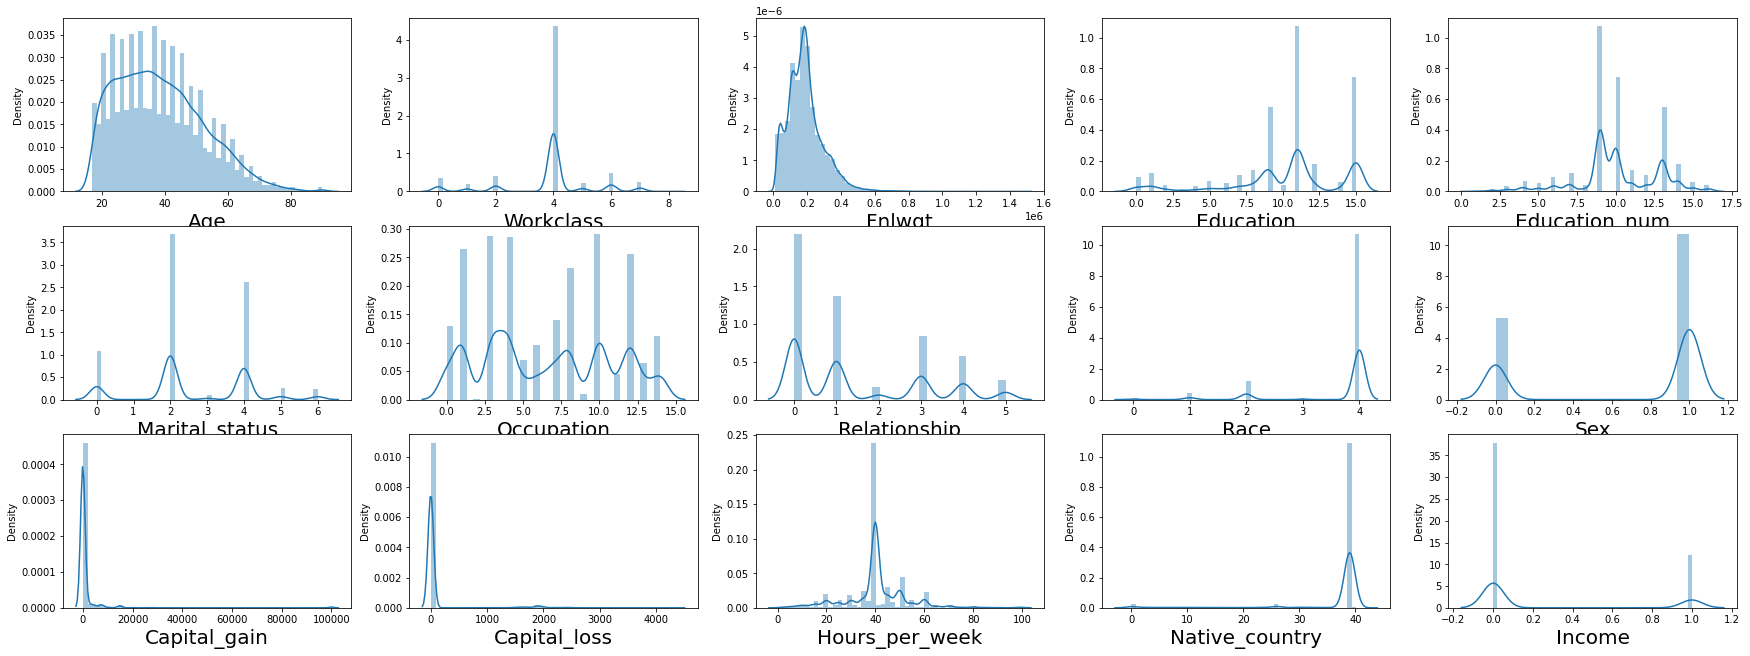

In [42]:
plt.figure(figsize = (30,30))
graph = 1

for column in data:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The data is skewed and there are outliers

In [46]:
#Dealing with outliers(applying IQR)

# findingout the quantile of data 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", df.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-df.shape[0])/data.shape[0])

shape before and after
shape before         : (32560, 15)
shape after          : (7888, 15)
Percentage Loss      : 0.7577395577395577


75% of the data is lost, so it not a good idea to apply IQR method

In [49]:
#Applying z score
from scipy.stats import zscore
z = np.abs(zscore(data))

df1 = data[(z<3).all(axis = 1)]

Applied z score

In [50]:
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", df1.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-df1.shape[0])/data.shape[0])

shape before and after
shape before         : (32560, 15)
shape after          : (27417, 15)
Percentage Loss      : 0.15795454545454546


15% of the data is being lost, so we can apply this

In [52]:
#applying standard scaler:

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df1)

Applied standard scaler

In [53]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,Age,1.213377
1,Workclass,1.088966
2,Fnlwgt,1.028929
3,Education,1.149207
4,Education_num,1.324450
5,Marital_status,1.148773
6,Occupation,1.089705
7,Relationship,1.681661
8,Race,1.051809
9,Sex,1.566835


The VIF is less than 5 for all the features, so there is no problem.

In [54]:
Y = df1['Income']
X = df1.drop(columns = ['Income'])

Spliting the data

In [55]:
#Handling class imbalance problem by oversampling the minority classes.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over, Y_over = SM.fit_resample(X,Y)

Dealt with the problem of class imbalance using oversampling

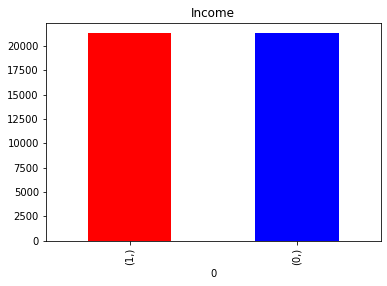

In [56]:
pd.DataFrame(Y_over).value_counts().plot(kind='bar', title='Income', color=['r','b'])

Visualization of class balance agfter applying overfitting

In [59]:
y = pd.Series(Y_over)
y

0        0
1        0
2        0
3        0
4        0
        ..
42553    1
42554    1
42555    1
42556    1
42557    1
Length: 42558, dtype: int64

Converted the data into series

In [61]:
x = pd.DataFrame(X_over)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
4,49,4,160187,6,5,3,8,1,2,0,0,0,16,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42553,57,4,176700,11,10,2,3,0,4,1,0,0,40,39
42554,56,4,282023,13,14,2,10,0,4,1,0,0,44,39
42555,33,4,197894,9,12,2,10,0,4,0,0,0,56,36
42556,46,4,151326,10,9,2,7,4,2,0,14990,0,40,39


Converted the data into dataframe

In [64]:
x.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
4,49,4,160187,6,5,3,8,1,2,0,0,0,16,23


Renamed the columns

In [95]:
x.skew()

Age                0.231862
Workclass         -0.732225
Fnlwgt             0.635498
Education         -0.983582
Education_num     -0.268730
Marital_status     0.310992
Occupation         0.098392
Relationship       1.120637
Race              -2.816832
Sex               -0.830469
Capital_gain       3.269316
Capital_loss      35.011480
Hours_per_week    -0.490505
Native_country    -5.922815
dtype: float64

Skewness is high for some features

In [96]:
x.drop(columns = ['Capital_loss'], axis =1, inplace = True)

Dropped the column capital loss

In [100]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
(pt.fit(x))

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

Applied power transformer

In [104]:
x1 = pd.DataFrame((pt.transform(x)))
x1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.829656,1.845170,-1.129684,-0.546882,1.146196,-0.231558,-0.580221,-0.890372,0.338322,0.667558,-0.385489,-2.444032,0.173625
1,-0.114628,0.074268,0.425685,0.090565,-0.654969,-1.943245,-0.055147,0.566397,0.338322,0.667558,-0.385489,-0.210590,0.173625
2,1.051574,0.074268,0.607909,-2.260934,-1.463017,-0.231558,-0.055147,-0.890372,-2.961486,0.667558,-0.385489,-0.210590,0.173625
3,-0.198134,0.074268,1.055020,0.435856,1.630478,-0.231558,-0.580221,1.569379,0.338322,-1.497998,-0.385489,-0.210590,0.173625
4,0.754556,0.074268,-0.150324,-1.360161,-2.197418,0.509052,0.422498,0.566397,-2.961486,-1.497998,-0.385489,-2.248384,-4.366868
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42553,1.340102,0.074268,0.029457,0.090565,-0.226468,-0.231558,-0.868245,-0.890372,0.338322,0.667558,-0.385489,-0.210590,0.173625
42554,1.268719,0.074268,1.032978,0.798145,1.630478,-0.231558,0.866451,-0.890372,0.338322,0.667558,-0.385489,0.194991,0.173625
42555,-0.541134,0.074268,0.249461,-0.546882,0.674857,-0.231558,0.866451,-0.890372,0.338322,-1.497998,-0.385489,1.504233,-4.120815
42556,0.525651,0.074268,-0.250239,-0.237209,-0.654969,-0.231558,0.188555,1.466928,-2.961486,-1.497998,2.595105,-0.210590,0.173625


Converted into data frame

In [107]:
x1.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Hours_per_week', 'Native_country']

Renamed the columns

In [112]:
#Model Building

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']

acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,Accuracy
0,KNearestNeighbors,0.855169
1,RandomForestClassifier,0.893515
2,DecisionTree,0.861278
3,GradientBoostingClassifier,0.877350


The model is trained

In [114]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, x1, y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,KNearestNeighbors,0.850793
1,RandomForestClassifier,0.884113
2,DecisionTree,0.847810
3,GradientBoostingClassifier,0.869521


Applied cross validation

In [115]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,KNearestNeighbors,0.855169,0.850793,0.004376
1,RandomForestClassifier,0.893515,0.884113,0.009402
2,DecisionTree,0.861278,0.847810,0.013469
3,GradientBoostingClassifier,0.877350,0.869521,0.007829


The difference is least in the model KNearestAlgorithm

In [116]:
#HYPERPARAMETER TUNING:

grid_param = {
    'n_neighbors' : range(2,8,2),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : range(20,40,5)
}

Applied hyperparameter tuning

In [127]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = grid_param)

Applied grid search cv

In [128]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 40, 5),
                         'n_neighbors': range(2, 8, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Trained the model

In [129]:
best_parameters = grid.best_params_
print(best_parameters)

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 6, 'weights': 'distance'}


Received the best parameters

In [130]:
#FINAL MODEL
#Substituting the best parameters in the  GradientBoostingClassifier:

KNN =  KNeighborsClassifier(algorithm = 'auto', leaf_size = 20, n_neighbors = 6, weights = 'distance')

KNN.fit(X_train, y_train)
KNN.score(X_test,y_test)
clf_report = classification_report(y_test,pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5340
           1       0.86      0.90      0.88      5300

    accuracy                           0.88     10640
   macro avg       0.88      0.88      0.88     10640
weighted avg       0.88      0.88      0.88     10640



Substituted the parameters in the model

In [131]:
#SAVING THE MODEL:

import joblib
joblib.dump(KNN, 'CensusIncome_final_model.pkl')

['CensusIncome_final_model.pkl']

Saved the model